# Setup

In [1]:
# python standard
import os

# third party
import numpy as np
import pandas as pd
import seaborn as sns
import tzlocal
from pylab import rcParams
from matplotlib import pyplot
%matplotlib inline
import rpy2.robjects as robjects

%load_ext rpy2.ipython

In [2]:
rcParams['figure.figsize'] = 22, 7
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['axes.formatter.useoffset'] = False

# Files/paths
# msg_data_path = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/'
# lib_path = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/physical_map/lib'

# msg_run = os.path.join(msg_data_path, '20151111')
# combine_dir = os.path.join(msg_run, 'combine-difffac_0.1')
# rqtl_dir = os.path.join(msg_run, 'rqtl', 'EPM')

# # Files for rqtl
# cross_path = os.path.join(rqtl_dir, 'cross_EPM_newChromNames_2017.RData')
# # Files for read.cross.msg
# read_cross_file1 = os.path.join(combine_dir, 'ancestry-probs-par2.tsv.sorted.csv')
# read_cross_file2 = os.path.join(combine_dir, 'ancestry-probs-par2.tsv.sorted.pulled.converted.thinned.f2_rqtl')
# EPM_pheno_file = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/EPM/results/rqtl_epm_pheno_file.csv'
# ancfile_par1 = os.path.join(combine_dir, 'ancestry-probs-par1.tsv.sorted.pulled.converted.thinned.f2_rqtl')

cross_path = 'cross_EPM_newChromNames_2017.RData'

# Libraries
# r_package_path = os.path.join(lib_path, 'Rpackages')

# Import R Data

In [3]:
%%R
# To load qtl you must have the qtl library installed in R
library(qtl)

In [4]:
%%R -i cross_path
load(cross_path)

In [5]:
%%R
# Current Phenotypes
print(names(cross$pheno))

 [1] "id"                      "sex"                    
 [3] "frac_in_closedAndMiddle" "frac_in_closedArms"     
 [5] "frac_in_middle"          "frac_in_openArms"       
 [7] "entries_to_closed"       "entries_to_open"        
 [9] "distance_in_closed"      "distance_in_open"       
[11] "speed_in_closed"         "speed_in_open"          
[13] "entries_o_c_ratio"       "distance_o_c_ratio"     
[15] "speed_o_c_ratio"         "total_frames"           
[17] "tested_more_than_once"   "pgm"                    
[19] "frac_entries_to_open"    "frac_distance_in_open"  
[21] "log_temp_pheno"         


# Merge R Data with New Features

In [6]:
# Import original data into python
miceDF = robjects.r('cross$pheno')
miceDF = robjects.pandas2ri.ri2py_dataframe(miceDF)

#extract ids
def extractNumber(mouseIDString):
    indexStart = 5
    indexEnd = mouseIDString.find('_')
    return mouseIDString[indexStart:indexEnd]

miceDF['mouseID'] = miceDF['id'].apply(lambda mouseIDString: extractNumber(mouseIDString))

# import new features
newFeaturesPath = 'all_the_data.csv'
newFeaturesDF = pd.read_csv(newFeaturesPath, index_col=0)
newFeaturesDF.set_index('mouse_details_mouseID', inplace=False)

# Drop duplicate mouse IDs in new features
newFeaturesDF = newFeaturesDF.drop_duplicates(subset='mouse_details_mouseID')

# merge new features into previous features
mergedDF = pd.merge(
    miceDF, 
    newFeaturesDF, 
    left_on='mouseID', 
    right_on='mouse_details_mouseID',
    how='left'
)

cross_R_DF = robjects.pandas2ri.py2ri(mergedDF)

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "id". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "sex". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "frac_in_closedAnd

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "peeking_count_CR". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "peeking_count_M". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "peeking_count_total". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to co

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_open_towards_middle_average_speed". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_open_towards_middle_average_speed_active". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_open_towards_middle_median_speed". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/

In [7]:
goodFeatures = [
    'fraction_in_arms_closed',
    'fraction_in_arms_open',
    'mouse_dimensions_mouseLength',
    'mouse_dimensions_mouseWidth',
    'mouse_dimensions_mouseSize',
    'rest_fraction_all_arms',
    'rest_fraction_closed_arms',
    'rest_fraction_open_arms',
    'turning_preferences_fraction_back',
    'turning_preferences_fraction_left',
    'turning_preferences_fraction_right',
    'turning_preferences_fraction_straight',
    'velocity_closed_towards_outside_average_speed_active',
    'velocity_open_towards_middle_average_speed_active',
    'velocity_open_towards_outside_average_speed_active'
]

allFeatures = list(newFeaturesDF.columns.values)
allFeatures.remove('inner_directory')
allFeatures.remove('mouse_details_EPM')
allFeatures.remove('mouse_details_date')
allFeatures.remove('mouse_details_mouseID')
allFeatures.remove('mouse_details_strain')
allFeatures.remove('mouse_details_sex')
allFeatures.remove('mouse_details_time')

In [8]:
%%R -i goodFeatures,cross_R_DF,allFeatures

goodFeatures <- goodFeatures
allFeatures <- allFeatures

for (feature in allFeatures){
    cross$pheno[,feature] <- as.numeric(cross_R_DF[,feature])
}

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [9]:
%%R 
print(summary(cross))

    F2 intercross

    No. individuals:    1571 

    No. phenotypes:     237 
    Percent phenotyped: 97.5 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 2706 3346 3181 3273 2538 2402 2543 2012 1806 2183 
                        1950 1134 1704 1529 1786 938 1543 1309 1853 2228 1588 
                        1647 2860 
    Percent genotyped:  99.1 
    Genotypes (%):    
          Autosomes:        AA:23.6      AB:51.6      BB:24.8  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:21.3     ABf:19.7     ABr:6.2       BB:0.4  
                            AY:24.1      BY:28.3 


## QTL scans to see if sex makes significant impact on QTL

### Separate data into males and females

#### Significant Features

In [10]:
# features that need to change legend positions
topleft_legend_mf = [
    'mouse_dimensions_mouseLength',
    'mouse_dimensions_mouseWidth',
    'mouse_dimensions_mouseSize',
    'turning_preferences_fraction_back',
    'velocity_closed_towards_outside_average_speed_active'
]

top_legend_mf = [
    'rest_fraction_open_arms',
    'turning_preferences_fraction_left',
    'velocity_open_towards_outside_average_speed_active'
]

In [11]:
%%R -i topleft_legend_mf,top_legend_mf

topleft_legend_mf <- topleft_legend_mf
top_legend_mf <- top_legend_mf

In [12]:
%%R
y <- pull.pheno(cross, 2)
males <- subset(cross, ind = (y == 'M'))
females <- subset(cross, ind = (y == 'F'))

In [13]:
%%R -w 1024 -h 512

for (feature in goodFeatures) {
    out.n <- scanone(cross, pheno=feature, model="normal", method="hk")
    out.m <- scanone(males, pheno=feature, model="normal", method="hk")
    out.f <- scanone(females, pheno=feature, model="normal", method="hk")
    png(paste('Species_and_Sexes_results/males&females/', feature, '_males&females.png', sep=""), width=1024)

    plot(out.n, out.m, out.f,
         main=feature,
         col=c('black','#00CCFF','#FF3300'),
         incl.markers=FALSE,
         bandcol='gray90',
         cex.main=2,
         gap=50000000,
         lty=1)
    
    if (feature %in% topleft_legend_mf) {
        legend('topleft', legend=c("w/o covariates", "male", "female"), col=c('black', '#00CCFF','#FF3300'), lty=1, lwd=3, cex=1.5)
    }
    else if (feature %in% top_legend_mf) {
        legend('top', legend=c("w/o covariates", "male", "female"), col=c('black', '#00CCFF','#FF3300'), lty=1, lwd=3, cex=1.5)
    }
    else {
        legend('topright', legend=c("w/o covariates", "male", "female"), col=c('black', '#00CCFF','#FF3300'), lty=1, lwd=3, cex=1.5)
    }
    
    #Plot thresholds
    thresh <- 4
    abline(h=thresh, lty=2, col="dimgray")
    
    cat(feature, ": \n")
    print(summary(out.n, threshold=4, format="allpeaks"))
    cat("\n")
    
    cat(feature, ", male: \n")
    print(summary(out.m, threshold=4, format="allpeaks"))
    cat("\n")
    
    cat(feature, ", female: \n")
    print(summary(out.f, threshold=4, format="allpeaks"))
    cat("\n")
    dev.off()
}

fraction_in_arms_closed : 
               chr      pos  lod
1:124640333      1 1.25e+08 6.80
2:71726747       2 7.17e+07 4.28
3:144618317      3 1.45e+08 5.48
4:38746931       4 3.87e+07 9.88
7:212766         7 2.13e+05 6.15
9:127281692      9 1.27e+08 8.85
14:88915211     14 8.89e+07 5.93
8a:69152933     16 6.92e+07 4.80
19:31415990     19 3.14e+07 4.14
16-21:21449444  21 2.14e+07 5.75

fraction_in_arms_closed , male: 
            chr      pos  lod
1:125476229   1 1.25e+08 5.03
3:144618317   3 1.45e+08 4.53
4:38730213    4 3.87e+07 6.85

fraction_in_arms_closed , female: 
            chr      pos  lod
9:144938864   9 1.45e+08 6.83

fraction_in_arms_open : 
               chr      pos   lod
1:127954521      1 1.28e+08  5.89
2:71726747       2 7.17e+07  4.09
3:144618317      3 1.45e+08  4.39
4:30131424       4 3.01e+07 11.50
7:220609         7 2.21e+05  5.52
9:128952147      9 1.29e+08  7.79
14:88915211     14 8.89e+07  7.00
17:102411467    17 1.02e+08  4.25
19:38210403     19 3.82e+07 

#### QTL by sex for all features

In [ ]:
'''
%%R -w 1024 -h 512

for (feature in allFeatures) {
    out.n <- scanone(cross, pheno=feature, model="normal", method="hk")
    out.m <- scanone(males, pheno=feature, model="normal", method="hk")
    out.f <- scanone(females, pheno=feature, model="normal", method="hk")
    png(paste('Species_and_Sexes_results/males&females_all/', feature, '_none&m&f.png', sep=""), width=1024)

    plot(out.n, out.m, out.f,
         main=feature,
         col=c('black','#00CCFF','#FF3300'),
         incl.markers=FALSE,
         bandcol='gray90',
         cex.main=2,
         gap=50000000,
         lty=1)
    
    legend('topleft', legend=c("w/o covariates", "male", "female"), col=c('black', '#00CCFF','#FF3300'), lty=1, lwd=3, cex=1.5)
    
    #Plot thresholds
    thresh <- 4
    abline(h=thresh, lty=2, col="dimgray")
}
'''

#### Plot results of scans with sex just as additive covariate

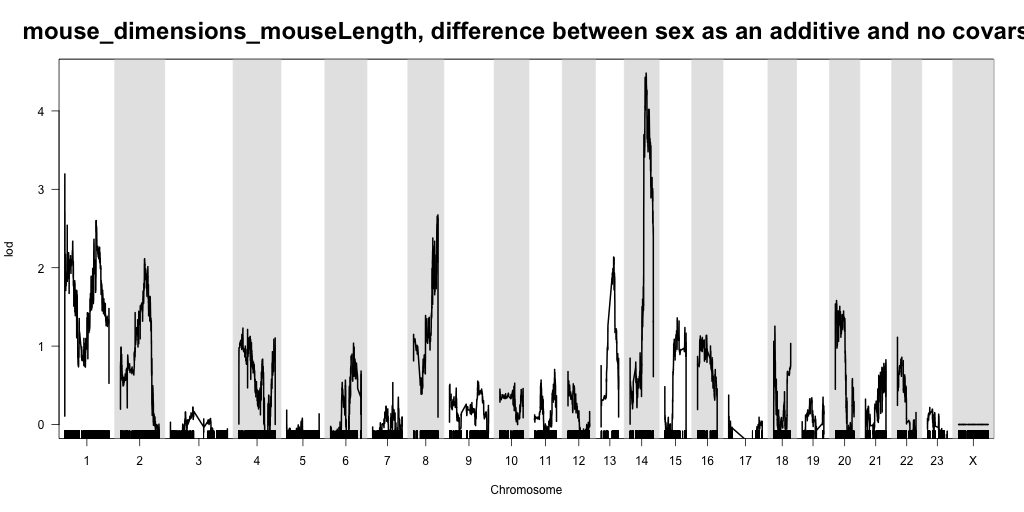

In [20]:
%%R -w 1024 -h 512

sex <- as.numeric(pull.pheno(cross, "sex") == "M")
out.n <- scanone(cross, pheno='mouse_dimensions_mouseLength', model='normal',method='hk')
out.a <- scanone(cross, pheno='mouse_dimensions_mouseLength', model="normal", method="hk", addcovar=sex)
plot(out.a-out.n,
     bandcol = "gray90",
     col=c('black'),
     main="mouse_dimensions_mouseLength, difference between sex as an additive and no covars",
     cex.main=2,
     gap=50000000,
     lty=1)

In [15]:
%%R -w 1024 -h 512

sex <- as.numeric(pull.pheno(cross, "sex") == "M")
for (feature in goodFeatures) {
    out.n <- scanone(cross, pheno=feature, model="normal", method="hk")
    out.a <- scanone(cross, pheno=feature, model="normal", method="hk", addcovar=sex)
    png(paste('Species_and_Sexes_results/none&additive/', feature, '_none&additive.png', sep=""), width=1024)
    main <- bquote(.(feature) ~ ": sex as an additive - without covars")
    
    plot(out.a-out.n,
         main=main,
         col='black',
         incl.markers=FALSE,
         bandcol='gray90',
         cex.main=2,
         gap=50000000,
         lty=1)

    #Plot thresholds
    #thresh <- 2.5
    #abline(h=thresh, lty=2, col="dimgray")
    
    cat(feature, ": \n")
    #format="allpeaks" displays the maximum LOD score or each column, with the position at which each was maximized.
    print(summary(out.a, threshold=2.5, format="allpeaks"))
    cat("\n")

    dev.off()
}

fraction_in_arms_closed : 
               chr      pos  lod
1:124640333      1 1.25e+08 6.59
2:71726747       2 7.17e+07 4.43
3:144618317      3 1.45e+08 5.67
4:38746931       4 3.87e+07 9.73
5:127953138      5 1.28e+08 2.84
7:200278         7 2.00e+05 6.01
9:127281692      9 1.27e+08 8.76
14:88915211     14 8.89e+07 5.83
15:60958792     15 6.10e+07 3.61
8a:69152933     16 6.92e+07 4.97
17:102411467    17 1.02e+08 3.62
19:31415990     19 3.14e+07 4.16
16-21:21250972  21 2.13e+07 6.07
X:106085906      X 1.06e+08 3.00

fraction_in_arms_open : 
               chr      pos   lod
1:127954521      1 1.28e+08  5.67
2:71726747       2 7.17e+07  4.21
3:144618317      3 1.45e+08  4.51
4:30131424       4 3.01e+07 11.34
5:127953138      5 1.28e+08  2.74
7:220609         7 2.21e+05  5.39
9:128952147      9 1.29e+08  7.73
14:88915211     14 8.89e+07  6.92
15:61246181     15 6.12e+07  3.55
8a:69379925     16 6.94e+07  3.78
17:102411467    17 1.02e+08  4.42
19:38210403     19 3.82e+07  4.62
16-21:2499

#### QTL scans of males and females combined, using sex as an interactive covariate to detect QTL that have different effects on the two sexes.

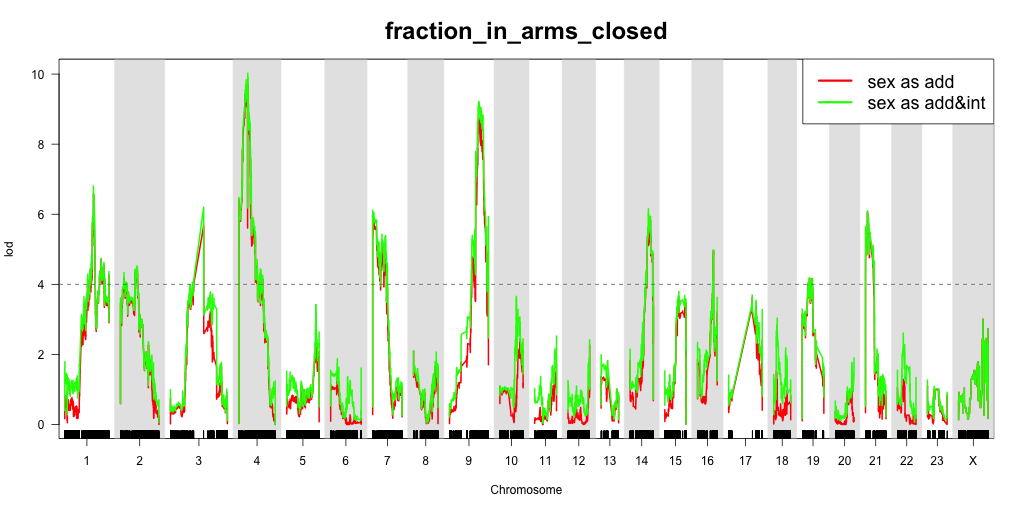

In [19]:
%%R -w 1024 -h 512
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
out.a <- scanone(cross, pheno='fraction_in_arms_closed', model='normal',method='hk', addcovar=sex)
out.i <- scanone(cross, pheno='fraction_in_arms_closed', model="normal", method="hk", addcovar=sex, intcovar=sex)
plot(out.a, out.i,
     bandcol = "gray90",
     col=c('red','green'),
     main="fraction_in_arms_closed",
     cex.main=2,
     gap=50000000,
     lty=1)

legend('topright', legend=c("sex as add", "sex as add&int"), col=c("red", "green"), lty=1, lwd=3, cex=1.5)

# Plot thresholds
thresh <- 4
abline(h=thresh, lty=2, col="dimgray")        

In [17]:
%%R -w 1024 -h 512
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
for (feature in goodFeatures) {
    out.a <- scanone(cross, pheno=feature, model="normal", method="hk", addcovar=sex)
    out.i <- scanone(cross, pheno=feature, model="normal", method="hk", addcovar=sex, intcovar=sex)
    png(paste('Species_and_Sexes_results/interactive_minus_additive/', feature, '.png', sep=""), width=1024)
    main <- bquote(.(feature) ~ ": interactive&additive - additive")

    plot(out.i-out.a,
         main=main,
         col=c("black"),
         incl.markers=FALSE,
         bandcol='gray90',
         cex.main=2,
         gap=50000000,
         lty=1)
    
    # Plot thresholds
    thresh <- 2.5
    abline(h=thresh, lty=2, col="dimgray") 

    cat(feature, "with threshold 2.5: \n")
    print(summary(out.i-out.a, threshold=2.5, format="allpeaks"))
    cat("\n")
    
    cat(feature, "with threshold 3: \n")
    print(summary(out.i-out.a, threshold=3, format="allpeaks"))
    cat("\n")
    
    dev.off()
}

fraction_in_arms_closed with threshold 2.5: 
            chr      pos  lod
10:71086567  10 71086567 2.85

fraction_in_arms_closed with threshold 3: 
    There were no LOD peaks above the threshold.

fraction_in_arms_open with threshold 2.5: 
            chr      pos  lod
10:71086567  10 71086567 2.85

fraction_in_arms_open with threshold 3: 
    There were no LOD peaks above the threshold.

mouse_dimensions_mouseLength with threshold 2.5: 
               chr      pos  lod
4:128826963      4 1.29e+08 4.06
14:101036844    14 1.01e+08 3.73
17:133464795    17 1.33e+08 4.25
20:13230        20 1.32e+04 2.65
16-21:67968840  21 6.80e+07 2.53

mouse_dimensions_mouseLength with threshold 3: 
             chr      pos  lod
4:128826963    4 1.29e+08 4.06
14:101036844  14 1.01e+08 3.73
17:133464795  17 1.33e+08 4.25

mouse_dimensions_mouseWidth with threshold 2.5: 
             chr      pos  lod
4:131729408    4 1.32e+08 2.52
12:22698630   12 2.27e+07 3.85
17:145841456  17 1.46e+08 3.30

mouse_dime